Loading the dataset

In [1]:
import pandas as pd

# Defining the file path
file_path = r"C:\Users\HUBERT\Desktop\Datasets\Covid19.csv"

# Loading the CSV file into the DataFrame(df)
df = pd.read_csv(file_path)

# Displaying the first few rows of the DataFrame
print(df)

          Date     State          Region  Confirmed  Deaths  Recovered
0    4/29/2020       NaN     Afghanistan       1939      60        252
1    4/29/2020       NaN         Albania        766      30        455
2    4/29/2020       NaN         Algeria       3848     444       1702
3    4/29/2020       NaN         Andorra        743      42        423
4    4/29/2020       NaN          Angola         27       2          7
..         ...       ...             ...        ...     ...        ...
316  4/29/2020   Wyoming              US        545       7          0
317  4/29/2020  Xinjiang  Mainland China         76       3         73
318  4/29/2020     Yukon          Canada         11       0          0
319  4/29/2020    Yunnan  Mainland China        185       2        181
320  4/29/2020  Zhejiang  Mainland China       1268       1       1263

[321 rows x 6 columns]


In [2]:
df.count()

Date         321
State        140
Region       321
Confirmed    321
Deaths       321
Recovered    321
dtype: int64

checking details of the dataset

In [3]:
df.describe

<bound method NDFrame.describe of           Date     State          Region  Confirmed  Deaths  Recovered
0    4/29/2020       NaN     Afghanistan       1939      60        252
1    4/29/2020       NaN         Albania        766      30        455
2    4/29/2020       NaN         Algeria       3848     444       1702
3    4/29/2020       NaN         Andorra        743      42        423
4    4/29/2020       NaN          Angola         27       2          7
..         ...       ...             ...        ...     ...        ...
316  4/29/2020   Wyoming              US        545       7          0
317  4/29/2020  Xinjiang  Mainland China         76       3         73
318  4/29/2020     Yukon          Canada         11       0          0
319  4/29/2020    Yunnan  Mainland China        185       2        181
320  4/29/2020  Zhejiang  Mainland China       1268       1       1263

[321 rows x 6 columns]>

In [4]:
df.head()

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7


final code 

In [6]:
 
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Load the Covid19 data
file_path = r"C:\Users\HUBERT\Desktop\Datasets\Covid19.csv"
df = pd.read_csv(file_path)

In [8]:
# Display the first few rows of the data
print(df.head())

# Print column names
print(df.columns)

        Date State       Region  Confirmed  Deaths  Recovered
0  4/29/2020   NaN  Afghanistan       1939      60        252
1  4/29/2020   NaN      Albania        766      30        455
2  4/29/2020   NaN      Algeria       3848     444       1702
3  4/29/2020   NaN      Andorra        743      42        423
4  4/29/2020   NaN       Angola         27       2          7
Index(['Date', 'State', 'Region', 'Confirmed', 'Deaths', 'Recovered'], dtype='object')


In [9]:
# Clean column names by stripping leading/trailing spaces and converting to lowercase
df.columns = df.columns.str.strip().str.lower()

In [10]:
# Print cleaned column names
print(df.columns)

Index(['date', 'state', 'region', 'confirmed', 'deaths', 'recovered'], dtype='object')


In [11]:
# Display summary statistics
print(df.describe())

# Display info to understand data types and missing values
print(df.info())

# Check for missing values
print(df.isnull().sum())

           confirmed        deaths      recovered
count     321.000000    321.000000     321.000000
mean     9949.800623    709.152648    3030.277259
std     31923.853086   3236.162817   14364.870365
min         0.000000      0.000000       0.000000
25%       104.000000      2.000000       2.000000
50%       653.000000     12.000000      73.000000
75%      4655.000000    144.000000     587.000000
max    299691.000000  27682.000000  132929.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321 entries, 0 to 320
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       321 non-null    object
 1   state      140 non-null    object
 2   region     321 non-null    object
 3   confirmed  321 non-null    int64 
 4   deaths     321 non-null    int64 
 5   recovered  321 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 15.2+ KB
None
date           0
state        181
region         0
confirmed      0
deaths    

In [12]:
# Handle missing values by filling with mean for numeric columns
df.fillna(df.mean(numeric_only=True), inplace=True)

# Alternatively, you could remove rows with missing values
# covid_df.dropna(inplace=True)

# Display the first few rows to verify changes
print(df.head())

        date state       region  confirmed  deaths  recovered
0  4/29/2020   NaN  Afghanistan       1939      60        252
1  4/29/2020   NaN      Albania        766      30        455
2  4/29/2020   NaN      Algeria       3848     444       1702
3  4/29/2020   NaN      Andorra        743      42        423
4  4/29/2020   NaN       Angola         27       2          7


           confirmed    deaths  recovered
confirmed   1.000000  0.907294   0.596008
deaths      0.907294  1.000000   0.519295
recovered   0.596008  0.519295   1.000000


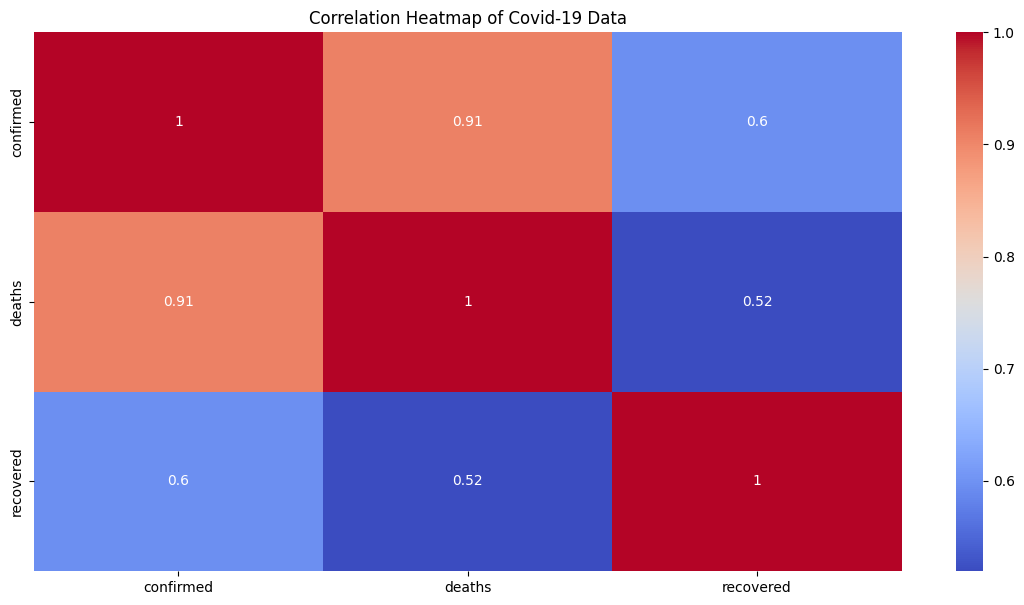

In [23]:
# total cases by country  
if 'country' in df.columns and 'totalcases' in df.columns:
    total_cases_by_country = df.groupby('country')['totalcases'].sum().sort_values(ascending=False)
    print(total_cases_by_country)

    # Plot total cases by top 10 countries
    plt.figure(figsize=(14, 7))
    top_10_countries = total_cases_by_country.head(10)
    top_10_countries.plot(kind='bar', color='skyblue')
    plt.xlabel('Country')
    plt.ylabel('Total Cases')
    plt.title('Top 10 Countries by Total Covid-19 Cases')
    plt.show()

#  average number of deaths by country
if 'country' in df.columns and 'totaldeaths' in df.columns:
    average_deaths_by_country = df.groupby('country')['totaldeaths'].mean().sort_values(ascending=False)
    print(average_deaths_by_country)

    # Plot average deaths by top 10 countries
    plt.figure(figsize=(14, 7))
    top_10_death_countries = average_deaths_by_country.head(10)
    top_10_death_countries.plot(kind='bar', color='salmon')
    plt.xlabel('Country')
    plt.ylabel('Average Deaths')
    plt.title('Top 10 Countries by Average Covid-19 Deaths')
    plt.show()

# Select only numeric columns for correlation analysis
numeric_cols = df.select_dtypes(include=['number']).columns
correlation_matrix = df[numeric_cols].corr()
print(correlation_matrix)

# Correlation heatmap
plt.figure(figsize=(14, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Covid-19 Data')
plt.show()

# Scatter plot of Total Cases vs. Total Deaths
if 'totalcases' in df.columns and 'totaldeaths' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='totalcases', y='totaldeaths', data=df)
    plt.xlabel('Total Cases')
    plt.ylabel('Total Deaths')
    plt.title('Total Cases vs. Total Deaths')
    plt.show()

# Scatter plot of Total Tests vs. Total Cases
if 'totaltests' in df.columns and 'totalcases' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='totaltests', y='totalcases', data=df)
    plt.xlabel('Total Tests')
    plt.ylabel('Total Cases')
    plt.title('Total Tests vs. Total Cases')
    plt.show()

# Scatter plot of Total Tests per Million vs. Total Cases per Million
if 'testspermillion' in df.columns and 'casespermillion' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='testspermillion', y='casespermillion', data=df)
    plt.xlabel('Total Tests per Million')
    plt.ylabel('Total Cases per Million')
    plt.title('Total Tests per Million vs. Total Cases per Million')
    plt.show()

# Example analysis: Case Fatality Rate (CFR) by country
if 'totaldeaths' in df.columns and 'totalcases' in df.columns:
    df['casefatalityrate'] = (df['totaldeaths'] / df['totalcases']) * 100
    cfr_by_country = df.groupby('country')['casefatalityrate'].mean().sort_values(ascending=False)
    print(cfr_by_country)

    # Plot top 10 countries by Case Fatality Rate (CFR)
    plt.figure(figsize=(14, 7))
    top_10_cfr_countries = cfr_by_country.head(10)
    top_10_cfr_countries.plot(kind='bar', color='purple')
    plt.xlabel('Country')
    plt.ylabel('Case Fatality Rate (%)')
    plt.title('Top 10 Countries by Case Fatality Rate')
    plt.show()

# Box plot of Total Cases by Country
if 'country' in df.columns and 'totalcases' in df.columns:
    plt.figure(figsize=(14, 7))
    sns.boxplot(x='country', y='totalcases', data=df)
    plt.xlabel('Country')
    plt.ylabel('Total Cases')
    plt.title('Box Plot of Total Cases by Country')
    plt.xticks(rotation=90)
    plt.show()